In [1]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib

# TODO: Use `requests` to do an HTTP request to fetch data located at that URL
# TODO: Create a `BeautifulSoup` instance with that data

In [4]:
url = "http://books.toscrape.com/"

# This is where we do an HTTP request to get the HTML from the website
response = requests.get(url)

# And this is where we feed that HTML to the Parser
soup = BeautifulSoup(response.content, "html.parser")

In [8]:
books_html = soup.find_all("article", class_="product_pod")
len(books_html)

20

## Parsing _one_ book

In [19]:
book_title = books_html[0].find("h3").find("a").attrs["title"]
book_title

'A Light in the Attic'

In [40]:
book_price = float(books_html[0].find(class_="price_color").text.strip("£"))
book_price

51.77

In [41]:
book_stars_html = books_html[0].find("p", class_="star-rating")
book_stars_html

<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

In [43]:
book_stars_html.attrs['class']

['star-rating', 'Three']

In [44]:
def parse_rating(rating_classes):
    if 'One' in rating_classes:
        return 1
    elif 'Two' in rating_classes:
        return 2
    elif 'Three' in rating_classes:
        return 3
    elif 'Four' in rating_classes:
        return 4
    elif 'Five' in rating_classes:
        return 5
    else:
        return 0

In [45]:
book_rating = parse_rating(books_html[0].find("p", class_="star-rating").attrs['class'])
book_rating

3

## Parsing _all_ books

In [47]:
books_dict = {
    'Title': [],
    'Price': [], 
    'Rating': [] 
}

In [48]:
for book in books_html:
    title = book.find("h3").find("a").attrs["title"]
    price = float(book.find("p", class_="price_color").text[1:])
    rating = parse_rating(book.find("p", class_="star-rating").attrs['class'])
    books_dict["Title"].append(title)
    books_dict["Price"].append(price)
    books_dict["Rating"].append(rating)

books_dict

{'Title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 'Price': [51.77,
  53.74,
  50.1,
  47.82,
  54.23,
  22.65,
  33.34,
  17.93,
  22.6,
  52.15,
  13.99,
  20.66,
  17.46,
  52.29,
  35.02,
  57.25,
  23.88,
  3

## Loading data in Pandas

In [58]:
books_df = pd.DataFrame.from_dict(books_dict)
books_df.head()

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5


<Axes: xlabel='Rating'>

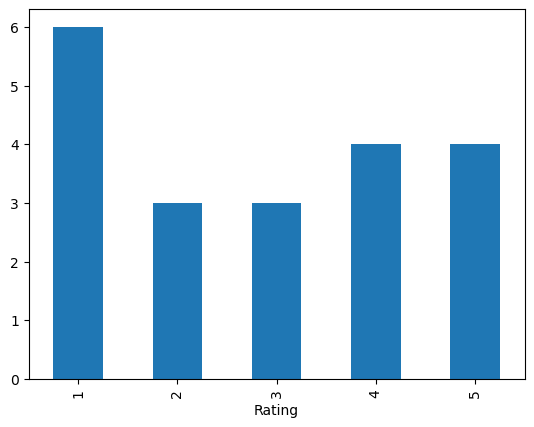

In [59]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar")

In [60]:
page = 1
url = f"http://books.toscrape.com/catalogue/page-{page}.html"
url

'http://books.toscrape.com/catalogue/page-1.html'

In [61]:
MAX_PAGE = 3
for page in range(1, MAX_PAGE + 1):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    print(url)

http://books.toscrape.com/catalogue/page-1.html
http://books.toscrape.com/catalogue/page-2.html
http://books.toscrape.com/catalogue/page-3.html


In [62]:
all_books_dict = { 'Title': [], 'Price': [], 'Rating': [] }

MAX_PAGE = 30
for page in range(1, MAX_PAGE + 1):
    print(f"Parsing page {page}...")
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    for book in soup.find_all("article", class_="product_pod"):
        title = book.find("h3").find("a").attrs["title"]
        price = float(book.find("p", class_="price_color").text[1:])
        rating = parse_rating(book.find("p", class_="star-rating").attrs["class"])
        all_books_dict["Title"].append(title)
        all_books_dict["Price"].append(price)
        all_books_dict["Rating"].append(rating)

print("Done!")

Parsing page 1...
Parsing page 2...
Parsing page 3...
Parsing page 4...
Parsing page 5...
Parsing page 6...
Parsing page 7...
Parsing page 8...
Parsing page 9...
Parsing page 10...
Parsing page 11...
Parsing page 12...
Parsing page 13...
Parsing page 14...
Parsing page 15...
Parsing page 16...
Parsing page 17...
Parsing page 18...
Parsing page 19...
Parsing page 20...
Parsing page 21...
Parsing page 22...
Parsing page 23...
Parsing page 24...
Parsing page 25...
Parsing page 26...
Parsing page 27...
Parsing page 28...
Parsing page 29...
Parsing page 30...
Done!


In [63]:
len(all_books_dict["Title"])

600

In [64]:
all_books_df = pd.DataFrame.from_dict(all_books_dict)
all_books_df.tail()

,Title,Price,Rating
595,The Grand Design,13.76,3
596,The Firm,45.56,3
597,The Fault in Our Stars,47.22,1
598,The False Prince (The Ascendance Trilogy #1),56.00,5
599,The Expatriates,44.58,2


<Axes: >

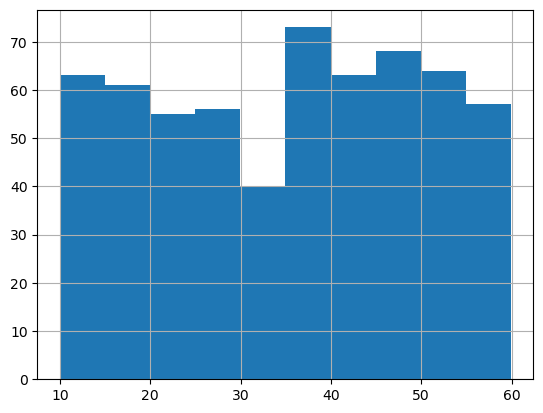

In [65]:
all_books_df["Price"].hist()

<Axes: xlabel='Rating'>

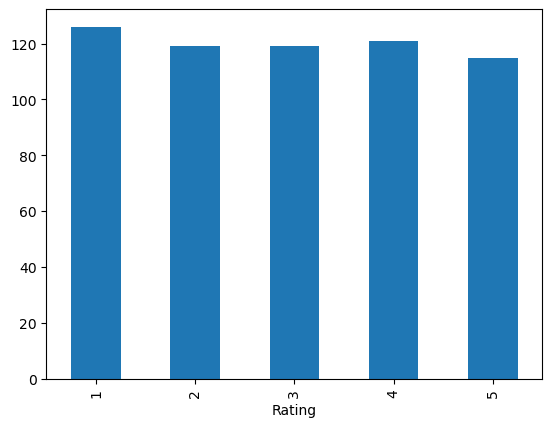

In [66]:
all_books_df.groupby("Rating").count()["Title"].plot(kind="bar")

In [67]:
all_books_df.to_excel('books.xlsx', sheet_name='Books')